# Classify With Rules

In [8]:
from context import speechact
import speechact.classifier.algorithmic as algo
import speechact.classifier.base as b
import speechact.evaluation as evaluation
import speechact.corpus as corp
import speechact.annotate as annotate
import speechact.classifier.rulebased as rule

In [9]:
labels = annotate.SpeechActLabels.get_labels()

# Load upsampled data.
corpus = corp.Corpus('../data/annotated data/dev-set-sentiment-upsampled.conllu.bz2')
test_corpus = corp.Corpus('../data/annotated data/dev-set-sentiment-test-upsampled.conllu.bz2')
train_corpus = corp.Corpus('../data/annotated data/dev-set-sentiment-train-upsampled.conllu.bz2')

# Punctuation Classifier

Punctuation classifier results:
Accuracy: 0.5451127819548872
Classification report:
              precision    recall  f1-score   support

   assertion       0.37      0.97      0.53       266
    question       0.95      0.94      0.94       266
   directive       0.00      0.00      0.00       266
  expressive       0.76      0.27      0.40       266
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.55      0.55      0.55      1064
   macro avg       0.30      0.31      0.27      1064
weighted avg       0.52      0.55      0.47      1064

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion         257         0          0           9           0        0   
question           16       250          0           0           0        0   
directive         238        14          0          14          

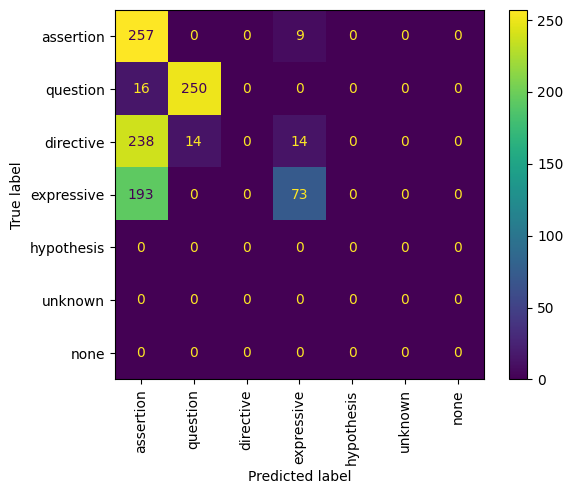

In [10]:
# Evaluate punctuation classifier.
punctuation_classifier = algo.PunctuationClassifier()
print('Punctuation classifier results:')
evaluation.evaluate(test_corpus, punctuation_classifier, labels,
                    draw_conf_matrix=True)

# Algorithmic Classifier

Algorithmic classifier results:
Accuracy: 0.5733082706766918
Classification report:
              precision    recall  f1-score   support

   assertion       0.39      0.81      0.53       266
    question       0.93      0.95      0.94       266
   directive       0.50      0.05      0.10       266
  expressive       0.69      0.47      0.56       266
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.57      0.57      0.57      1064
   macro avg       0.36      0.33      0.30      1064
weighted avg       0.63      0.57      0.53      1064

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion         216         1          5          43           0        0   
question           12       254          0           0           0        0   
directive         224        14         14          14          

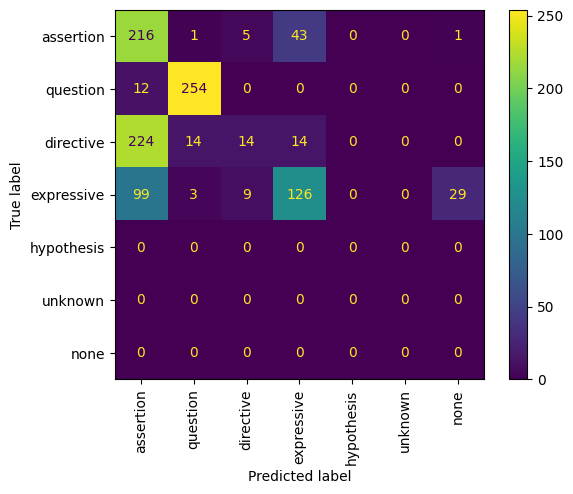

In [11]:
# Evaluate algorithmic classifier.
algo_classifier = algo.RuleBasedClassifier()
print('Algorithmic classifier results:')
evaluation.evaluate(test_corpus, algo_classifier, labels,
                    #print_missclassified=('directive', 'assertion'),
                    draw_conf_matrix=True)

# Preprogrammed Rule-based Classifier

Rule-based classifier results:
Accuracy: 0.42293233082706766
Classification report:
              precision    recall  f1-score   support

   assertion       0.45      0.77      0.57       266
    question       0.95      0.92      0.93       266
   directive       0.00      0.00      0.00       266
  expressive       0.00      0.00      0.00       266
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.42      0.42      0.42      1064
   macro avg       0.20      0.24      0.21      1064
weighted avg       0.35      0.42      0.37      1064

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion         206         0          0           0           0        0   
question            6       244          0           0           0        0   
directive          84        14          0           0          

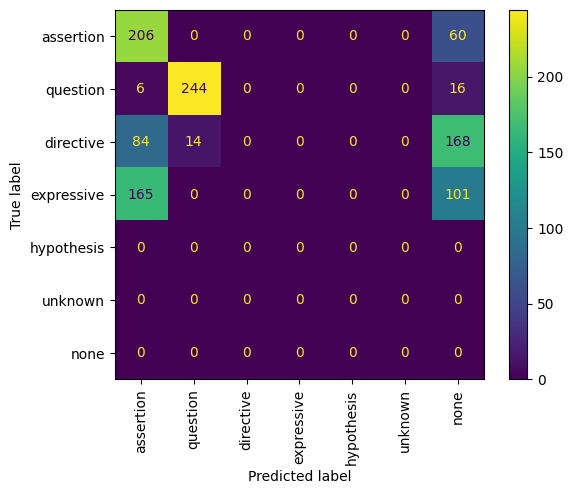

In [12]:
# Evaluate rule based classifier.
rule_classifer = rule.RuleBasedClassifier(ruleset_file='../models/ruleset_1.json')
print('Rule-based classifier results:')
evaluation.evaluate(test_corpus, rule_classifer, labels,
                    draw_conf_matrix=True)

# Trainable Rule-based Classifier (80% training data)

Trainable rule-based classifier results:
Accuracy: 0.6635338345864662
Classification report:
              precision    recall  f1-score   support

   assertion       0.47      0.84      0.61       266
    question       0.95      0.92      0.93       266
   directive       0.79      0.53      0.63       266
  expressive       0.70      0.37      0.49       266
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.66      0.66      0.66      1064
   macro avg       0.42      0.38      0.38      1064
weighted avg       0.73      0.66      0.66      1064

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion         223         0         16          25           0        0   
question            6       244         10           3           0        0   
directive          98        14        140          14 

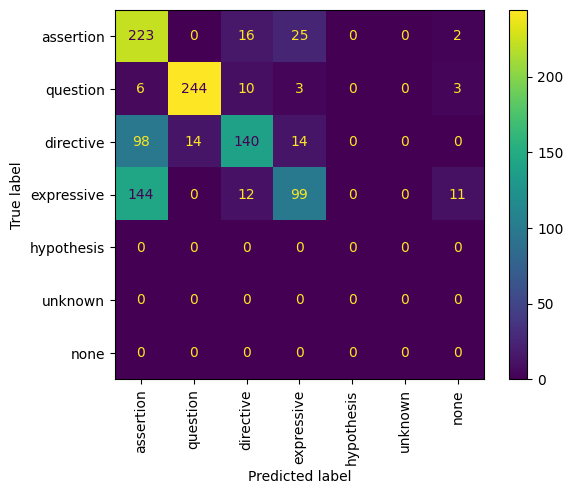

In [13]:
# Evaluate trainable rule based classifier.
trainable_rule_classifier_large = rule.TrainableClassifier()
trainable_rule_classifier_large.train(train_corpus)
print('Trainable rule-based classifier results:')
evaluation.evaluate(test_corpus, trainable_rule_classifier_large, labels,
                    draw_conf_matrix=True)

# Trainable Rule-based Classifier (20% training data)

To see how well it performs on a smaller traning size.

Trainable rule-based classifier results:
Accuracy: 0.5633608815426997
Classification report:
              precision    recall  f1-score   support

   assertion       0.44      0.61      0.51      1089
    question       0.91      0.90      0.91      1089
   directive       0.47      0.46      0.46      1089
  expressive       0.48      0.29      0.36      1089
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.56      0.56      0.56      4356
   macro avg       0.33      0.32      0.32      4356
weighted avg       0.57      0.56      0.56      4356

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion         661         9        284         126           0        0   
question           42       982         33          27           0        0   
directive         310        86        499         183 

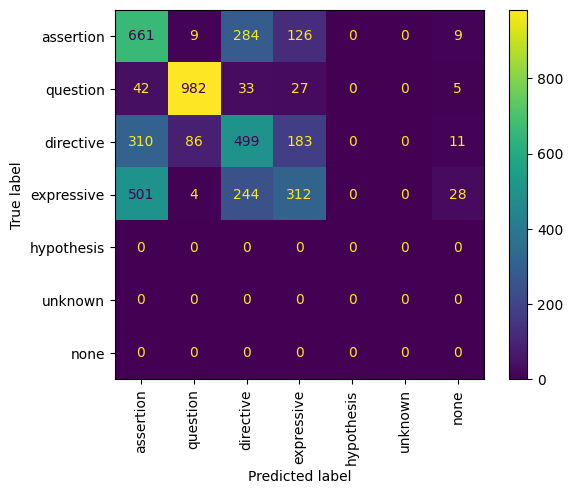

In [14]:
# Evaluate trainable rule based classifier.
trainable_rule_classifier_small = rule.TrainableClassifier()
trainable_rule_classifier_small.train(test_corpus)
print('Trainable rule-based classifier results:')
evaluation.evaluate(train_corpus, trainable_rule_classifier_small, labels,
                    draw_conf_matrix=True)

# Trainable Rule-based Sentiment Classifier (80% training data)

Trainable sentiment rule-based classifier results:
Accuracy: 0.6879699248120301
Classification report:
              precision    recall  f1-score   support

   assertion       0.52      0.76      0.62       266
    question       0.93      0.92      0.93       266
   directive       0.78      0.47      0.59       266
  expressive       0.67      0.60      0.63       266
  hypothesis       0.00      0.00      0.00         0
     unknown       0.00      0.00      0.00         0
        none       0.00      0.00      0.00         0

   micro avg       0.69      0.69      0.69      1064
   macro avg       0.42      0.39      0.40      1064
weighted avg       0.73      0.69      0.69      1064

Confusion matrix:
            assertion  question  directive  expressive  hypothesis  unknown  \
assertion         203         0         14          47           0        0   
question            6       244         10           3           0        0   
directive          98        14        126   

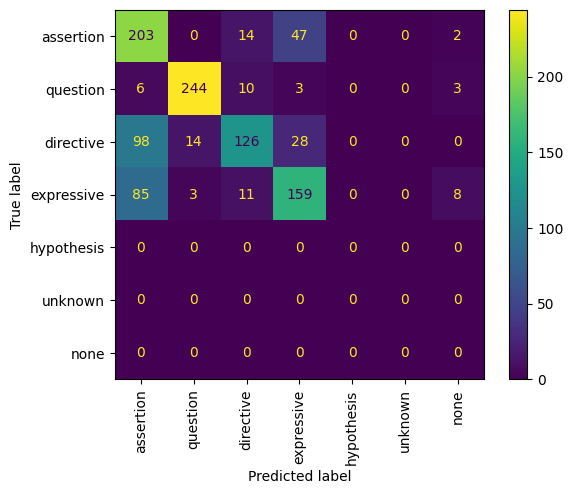

In [15]:
# Evaluate trainable rule based classifier.
trainable_rule_classifier_sentiment_large = rule.TrainableSentimentClassifier()
trainable_rule_classifier_sentiment_large.train(train_corpus)
print('Trainable sentiment rule-based classifier results:')
evaluation.evaluate(test_corpus, trainable_rule_classifier_sentiment_large, labels,
                    draw_conf_matrix=True)

# Trainable Rule-based Sentiment Classifier (20% training data)

In [ ]:
# Evaluate trainable rule based classifier.
trainable_rule_classifier_sentiment_small = rule.TrainableSentimentClassifier()
trainable_rule_classifier_sentiment_small.train(train_corpus)
print('Trainable sentiment rule-based classifier results:')
evaluation.evaluate(test_corpus, trainable_rule_classifier_sentiment_small, labels,
                    draw_conf_matrix=True)